In [6]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [7]:
# Read in data from CSV file
data = pd.read_csv('ef_usa_emfac_db.csv')

In [8]:
# Split data into training and testing sets
train_data = data.loc[data['reference_year'] >= 2011]
test_data = data.loc[data['reference_year'] == 2010]

In [9]:
# Define features and target variable
X_train = train_data[['lower_speed_interval', 'upper_speed_interval']]
y_train = train_data['ef']

In [10]:
X_test = test_data[['lower_speed_interval', 'upper_speed_interval']]
y_test = test_data['ef']

In [11]:
# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
# Make predictions on test data
predictions = model.predict(X_test)

In [13]:
# Print out predicted values
print(predictions)

[177.65319695 143.03095808 135.91436664 ...  70.97546974  63.8588783
  56.74228686]


In [18]:
    import pandas as pd
    import numpy as np
    import warnings
    warnings.filterwarnings("ignore", category=DeprecationWarning)
    import matplotlib.pyplot as plt
    from statsmodels.tsa.arima.model import ARIMA


In [19]:
# Load the data from a CSV filel
df = pd.read_csv('usa_combined.csv')

In [20]:
# Convert the 'model_year' column to a datetime format
df['reference_year'] = pd.to_datetime(df['reference_year'], format='%Y')
#print(df['reference_year'])

In [42]:
# Set the 'model_year' column as the index
df.set_index('reference_year', inplace=True)

In [43]:
# Fit an ARIMA model to the emissions factor time series
model = ARIMA(df['ef'], order=(1, 1, 1))
results = model.fit()

C:\Users\goran\anaconda3\envs\DAB300\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\goran\anaconda3\envs\DAB300\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\goran\anaconda3\envs\DAB300\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


C:\Users\goran\anaconda3\envs\DAB300\lib\site-packages\statsmodels\tsa\base\tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


<AxesSubplot:title={'center':'Forecast of  emissions factor for vehicles'}>

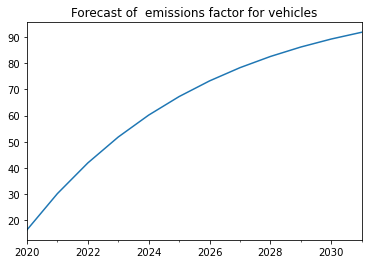

In [44]:
# Generate forecasts for the emissions factor using the ARIMA model
forecast = results.forecast(steps=12)
forecast.index = pd.date_range(start=df.index[-1], periods=12, freq='Y')
forecast.plot(title=f'Forecast of  emissions factor for vehicles')


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

In [33]:
# Load the data from a CSV file
df = pd.read_csv('ef_usa_emfac_db.csv')

In [34]:
df.dtypes

reference_year            int64
model_year                int64
fuel                     object
vkt                     float64
ef                      float64
pollutant                object
lower_speed_interval      int64
upper_speed_interval      int64
dtype: object

In [ ]:
# Convert the 'model_year' column to a datetime format
df['reference_year'] = pd.to_datetime(df['reference_year'], format='%Y')

In [25]:
# Set the 'model_year' column as the index
df.set_index('reference_year', inplace=True)

In [27]:
# Split the data into training and test sets
train, test = train_test_split(df, test_size=0.2, shuffle=False)

In [ ]:
# Evaluate the forecast accuracy using mean absolute error
mae = abs(test - forecast).mean().values[0]
print(f'Mean absolute error: {mae:.2f}')

In [ ]:
# Display the plots
plt.show()

In [18]:
# Step 1: Load and preprocess the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [19]:
# Load the data from a CSV filel
df = pd.read_csv('usa_combined.csv')

In [20]:
# Convert the data to a time series object
df['reference_year'] = df['reference_year'].astype(int)
ts = pd.Series(df['ef'].values, index=pd.to_datetime(df['reference_year'], format='%Y'))
ts


reference_year
2010-01-01    0.349365
2010-01-01    0.263701
2010-01-01    0.133710
2010-01-01    0.058837
2010-01-01    0.040486
                ...   
2022-01-01    0.048129
2022-01-01    0.053466
2022-01-01    0.088261
2022-01-01    0.120495
2022-01-01    0.141892
Length: 277342, dtype: float64

In [21]:
# Ensure that the data is in ascending order by the index
ts.sort_index(inplace=True)

In [22]:
# Step 2: Split the data
train_data = ts['2010':'2017']
test_data = ts['2018':'2020']

In [23]:
# Step 3: Fit the ARIMA model
# Define the parameters for the ARIMA model (p, d, q)
p = 1
d = 0
q = 1

In [24]:
# Fit the ARIMA model to the training data
model = ARIMA(train_data, order=(p, d, q))
arima_results = model.fit()

C:\Users\goran\anaconda3\envs\DAB300\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\goran\anaconda3\envs\DAB300\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\goran\anaconda3\envs\DAB300\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [25]:
# Step 4: Evaluate the accuracy of the model
# Generate forecasts for the test set
arima_forecast = arima_results.forecast(steps=len(test_data))

C:\Users\goran\anaconda3\envs\DAB300\lib\site-packages\statsmodels\tsa\base\tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


In [26]:
# Calculate the error metrics for the forecasts
mae = np.mean(np.abs(arima_forecast - test_data))
mse = np.mean(np.square(arima_forecast - test_data))
rmse = np.sqrt(mse)

TypeError: '<' not supported between instances of 'Timestamp' and 'int'

In [63]:
# Step 1: Load and preprocess the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA



In [64]:
# Load the data from a CSV file
df = pd.read_csv('ef_usa_emfac_db.csv')

In [65]:
# Convert the data to a time series object
ts = pd.Series(df['ef'].values, index=pd.to_datetime(df['reference_year'], format='%Y'))


In [66]:
# Ensure that the data is in ascending order by the index
ts.sort_index(inplace=True)

In [67]:
# Step 2: Split the data
train_data = ts['2010':'2017']
test_data = ts['2018':'2020']

In [68]:
# Step 3: Fit the ARIMA model
# Define the parameters for the ARIMA model (p, d, q)
p = 1
d = 0
q = 1

In [69]:
# Fit the ARIMA model to the training data
model = ARIMA(train_data, order=(p, d, q))
arima_results = model.fit()

C:\Users\goran\anaconda3\envs\DAB300\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\goran\anaconda3\envs\DAB300\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\goran\anaconda3\envs\DAB300\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [70]:
# Step 4: Evaluate the accuracy of the model
# Generate forecasts for the test set
arima_forecast = arima_results.forecast(steps=len(test_data))

C:\Users\goran\anaconda3\envs\DAB300\lib\site-packages\statsmodels\tsa\base\tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


In [71]:
print(arima_forecast)

67018     16.930487
67019     31.349020
67020     43.495790
67021     53.728732
67022     62.349385
            ...    
79193    108.442687
79194    108.442687
79195    108.442687
79196    108.442687
79197    108.442687
Name: predicted_mean, Length: 12180, dtype: float64


In [72]:
print(test_data)

reference_year
2019-01-01    20.158604
2019-01-01    16.325154
2019-01-01    11.499217
2019-01-01     8.319943
2019-01-01     6.103668
                ...    
2020-01-01     0.003794
2020-01-01     0.004088
2020-01-01     0.004459
2020-01-01     0.004746
2020-01-01     0.005431
Length: 12180, dtype: float64


In [74]:
# Calculate the error metrics for the forecasts

mae = np.mean(np.abs(arima_forecast - test_data))
mse = np.mean(np.square(arima_forecast - test_data))
rmse = np.sqrt(mse)

TypeError: '<' not supported between instances of 'Timestamp' and 'int'

In [133]:
# Step 1: Load and preprocess the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [134]:
# Load the data from a CSV file
df = pd.read_csv('ef_usa_emfac_db.csv')

In [137]:
c = 1
# Add the constant value to the ef column
df['ef_plus_c'] = df['ef'] + c
# Apply the natural logarithm function to the ef_plus_c column
df['log_ef'] = np.log(df['ef_plus_c'])

In [138]:
# Convert the data to a time series object
ts = pd.Series(df['log_ef'].values, index=pd.to_datetime(df['reference_year'], format='%Y'))

In [139]:
# Ensure that the data is in ascending order by the index
ts.sort_index(inplace=True)

In [140]:
# Step 2: Split the data
train_data = ts['2010':'2017']
test_data = ts['2018':'2020']

In [141]:
# Step 3: Fit the ARIMA model
# Define the parameters for the ARIMA model (p, d, q)
p = 1
d = 0
q = 1

In [142]:
# Fit the ARIMA model to the training data
model = ARIMA(train_data, order=(p, d, q))
arima_results = model.fit()

C:\Users\goran\anaconda3\envs\DAB300\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\goran\anaconda3\envs\DAB300\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\goran\anaconda3\envs\DAB300\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [143]:
# Step 4: Evaluate the accuracy of the model
# Generate forecasts for the test set
arima_forecast = arima_results.forecast(steps=len(test_data))

C:\Users\goran\anaconda3\envs\DAB300\lib\site-packages\statsmodels\tsa\base\tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


In [144]:
# Calculate the error metrics for the forecasts
mae = np.mean(np.abs(arima_forecast - test_data.values))
mse = np.mean(np.square(arima_forecast - test_data.values))
rmse = np.sqrt(mse)

In [145]:
# Print the error metrics
print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)

Mean Absolute Error (MAE): 1.491970399237457
Mean Squared Error (MSE): 4.403644626782614
Root Mean Squared Error (RMSE): 2.098486270334551


C:\Users\goran\anaconda3\envs\DAB300\lib\site-packages\statsmodels\tsa\base\tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


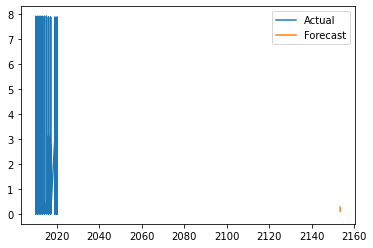

In [148]:
# Forecast the actual and predicted values
# Generate forecasts for the next 3 years (2021-2023)
future_forecast = arima_results.forecast(steps=3)

# Plot the actual and predicted values on a graph
plt.plot(ts.index, ts.values, label='Actual')
plt.plot(future_forecast.index, future_forecast, label='Forecast')
plt.legend()
plt.show()

In [146]:
# Step 5: Forecast the actual and predicted values
# Generate forecasts for the next 3 years (2021-2023)
future_forecast = arima_results.forecast(steps=3)

C:\Users\goran\anaconda3\envs\DAB300\lib\site-packages\statsmodels\tsa\base\tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,
